In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X, y)
predictions = reg1.predict(X)
print(f'Ошибка одного классификатора: {mean_squared_error(y, predictions)}')

Ошибка одного классификатора: 4201.076466066316


In [6]:
clf2 = DecisionTreeRegressor(max_depth=1)
clf2.fit(X, y-predictions)
predictions2 = clf2.predict(X)
print(f'Ошибка двух классификаторов: {mean_squared_error(y, predictions+predictions2)}')

Ошибка двух классификаторов: 3479.296530208821


In [7]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и 
    #при предсказании прибавляются с шагом eta
    return np.array([sum(((1 if i==0 else eta)* coef * alg.predict([x])[0] 
                          for i, (alg, coef) in enumerate(zip(trees_list, coef_list)))) 
                     for x in X])


def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)


def bias(y, z):
    return (y - z)


def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [15]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [16]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [17]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2360.998529289505
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тестовой выборке: 3774.318630570951


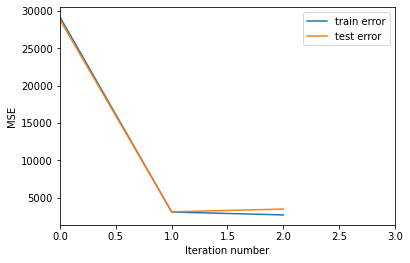

In [18]:
import matplotlib.pyplot as plt
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
get_error_plot(n_trees, train_errors, test_errors)

In [29]:
eta = 0.25
n_trees=10
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2543.4126763806535
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 2922.1674887689837


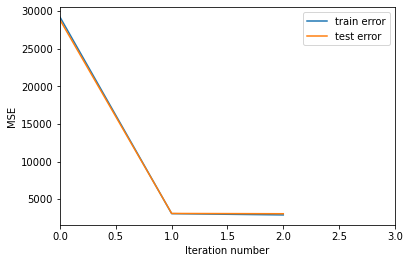

In [20]:
get_error_plot(n_trees, train_errors, test_errors)

In [24]:
n_trees = 25
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [25]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 25 деревьев глубиной 3     с шагом 0.25 на тренировочной выборке: 1317.5561722441178
Ошибка алгоритма из 25 деревьев глубиной 3     с шагом 0.25 на тестовой выборке: 2935.792907777644


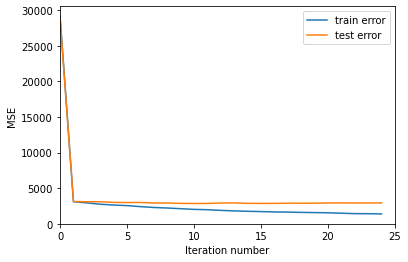

In [26]:
get_error_plot(n_trees, train_errors, test_errors)